In [56]:
#SafeCar - TDSVJ
#RM 95694 - Gabriel Mira Soares Santos
#RM 93423 - Jhonatas Oliveira

In [57]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.linear_model import ElasticNet
from matplotlib import colors
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from random import sample
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN

In [58]:
#LEITURA DE DADOS
link = "/content/dataset_velocidade.csv"
dados = pd.read_csv(link)
dados.head()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
0,NaN,-0.029431,-0.019621,9.781015,-0.122070,-0.006327,-0.112208,32.166023,0.010822,paved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved


#Pré-processamento

In [59]:
#Criando uma cópia do arquivo .CSV para poder utilizar em outras partes
dfc = dados.copy()

In [60]:
#checando se há valores nulos
dados.isnull().sum()

no_speed_bump       1247
acc_x_dashboard     1247
acc_y_dashboard     1247
acc_z_dashboard     1247
gyro_x_dashboard    1247
gyro_y_dashboard    1247
gyro_z_dashboard    1247
temp_dashboard      1247
speed               1247
road                   0
dtype: int64

In [61]:
#Dropando dados faltantes
dados = dados.dropna(how='any' , axis=0)
dfc = dfc.dropna(how='any' , axis=0)

In [62]:
#checando se foram removidos corretamente
dados.isnull().sum()

no_speed_bump       0
acc_x_dashboard     0
acc_y_dashboard     0
acc_z_dashboard     0
gyro_x_dashboard    0
gyro_y_dashboard    0
gyro_z_dashboard    0
temp_dashboard      0
speed               0
road                0
dtype: int64

In [63]:
#checando se há dados duplicados
dados.duplicated().sum()
dfc.duplicated().sum()

209

In [64]:
dados.drop_duplicates(inplace=True) 
dfc.drop_duplicates(inplace=True)
#Removendo dados duplicados

In [65]:
dados.head(10)

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved
5,1.0,0.006482,0.011504,9.850446,0.000000,-0.342020,-0.081690,32.357714,0.010822,paved
6,1.0,0.001693,0.001927,9.753481,-0.045776,-0.189432,0.040380,32.333753,0.010822,paved
7,1.0,-0.024643,-0.002861,9.807351,0.030518,-0.067362,-0.020655,32.309791,0.010822,paved
8,1.0,-0.029431,0.004321,9.749890,-0.183105,0.115743,-0.051173,32.357714,0.010822,paved
9,1.0,0.011270,0.010307,9.767846,-0.030518,-0.052103,-0.020655,32.309791,0.010822,paved
10,1.0,0.016059,0.009110,9.745101,0.091553,0.207296,-0.081690,32.357714,0.010822,paved


In [66]:
#Pegando uma amostra dos dados 
dfc_sample = dados.sample(1000)
dfc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 62948 to 90302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_speed_bump     1000 non-null   float64
 1   acc_x_dashboard   1000 non-null   float64
 2   acc_y_dashboard   1000 non-null   float64
 3   acc_z_dashboard   1000 non-null   float64
 4   gyro_x_dashboard  1000 non-null   float64
 5   gyro_y_dashboard  1000 non-null   float64
 6   gyro_z_dashboard  1000 non-null   float64
 7   temp_dashboard    1000 non-null   float64
 8   speed             1000 non-null   float64
 9   road              1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 85.9+ KB


#Análise Exploratória

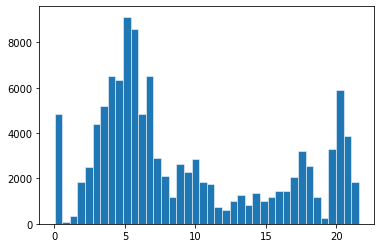

In [67]:
#Analisando a distribuição da velocidade
x = dados['speed']

fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

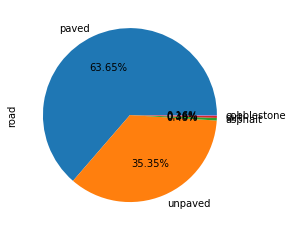

In [68]:
#Analisando a quantidade dos tipos de rua, aqui podemos ver que se passaram por muito mais ruas pavimentas, tendo uma parte de 63% preenchida do gráfico
dfc['road'].value_counts().plot.pie(autopct = '%0.2f%%') #barra
plt.show()

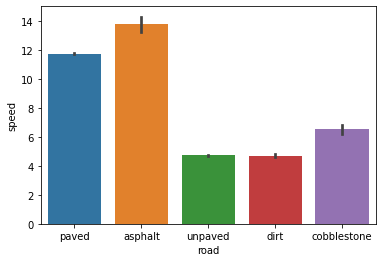

In [69]:
#Analisando as proporções das velocidades com base na rua em que se passa

sns.barplot(x = 'road', y = 'speed', data = dados)
plt.show()

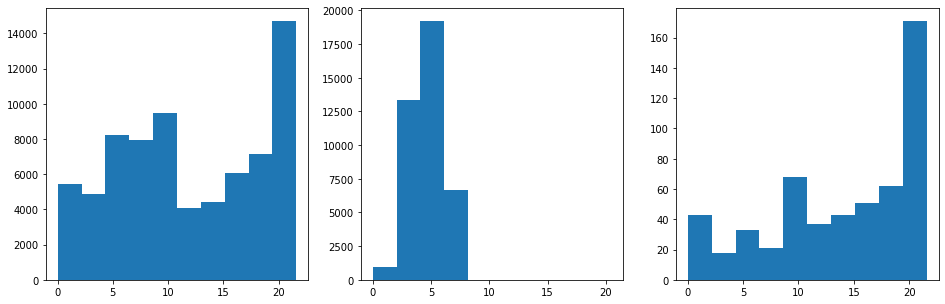

In [70]:
#Com base nos dados plotados, podemos visualizar com clareza os resultados da velocidade de cada rua
pavimentada = dados.loc[dados['road']== 'paved' ] #paved
velo1 = pavimentada['speed']
x = velo1

npavimentada = dados.loc[dados['road']== 'unpaved' ] #unpaved
velo2 = npavimentada['speed']
x = velo2

asfalto = dados.loc[dados['road']== 'asphalt' ] #asphalt
velo3 = asfalto['speed']
x = velo3

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

ax1.hist(velo1)
ax2.hist(velo2)
ax3.hist(velo3)
plt.show()

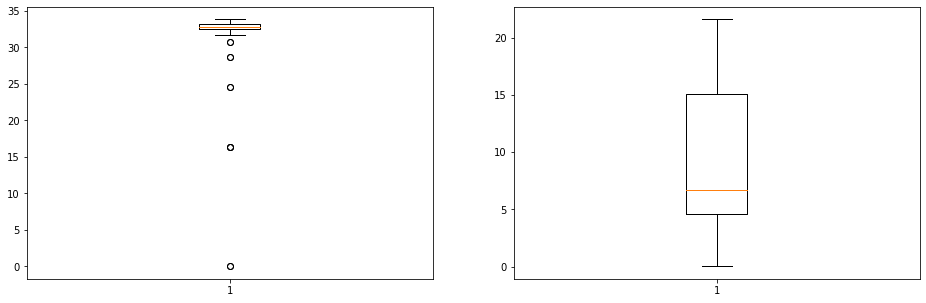

In [71]:
#identificando outliers, neste caso não iremos tratar pela quantidade, poderemos perder dados importantes
temp = dados['temp_dashboard']
spd = dados['speed']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.boxplot(temp)
ax2.boxplot(spd)
plt.show()

#Feature Engineering

In [72]:
#Label encoding
le = preprocessing.LabelEncoder()

dados["road"] = le.fit_transform( dados["road"] )

In [73]:
sc = StandardScaler() #Padronizando os dados
sc.fit_transform(dados)

array([[ 0.12807808, -0.45968405,  0.12812064, ..., -0.89871882,
        -1.46407089, -0.61037159],
       [ 0.12807808, -0.42541453,  0.12629352, ..., -1.01334605,
        -1.46407089, -0.61037159],
       [ 0.12807808, -0.41789195,  0.13786529, ..., -0.89871882,
        -1.46407089, -0.61037159],
       ...,
       [ 0.12807808, -0.20057305, -0.15934634, ..., -1.35722772,
        -1.46204917, -0.61037159],
       [ 0.12807808, -0.19555799, -0.16665482, ..., -1.81573662,
        -1.46204917, -0.61037159],
       [ 0.12807808, -0.12534727,  0.02092957, ..., -1.81573662,
        -1.46204917, -0.61037159]])

Abaixo utilizaremos modelos de regressões. Isso pois usaremos um tipo de dado continuo, então seria uma melhor opção

#Modelo de regressão simples

In [74]:
#separando dados e label
X = dados.drop('speed', axis = 1)
y = dados["speed"]

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [75]:
dados.columns

Index(['no_speed_bump', 'acc_x_dashboard', 'acc_y_dashboard',
       'acc_z_dashboard', 'gyro_x_dashboard', 'gyro_y_dashboard',
       'gyro_z_dashboard', 'temp_dashboard', 'speed', 'road'],
      dtype='object')

In [76]:
# Treinar o modelo
reta = LinearRegression()
reta.fit(X_train, y_train)

y_pred = reta.predict(X_test)

In [77]:
# avaliando o modelo, podemos ver que ele não é bom pois o r2 não foi tão grande, o mse também deu apenas 19 
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"Msa = {msa}")
print(f"R² = {r2}")

MSE = 28.177566594116158
Msa = 4.024947927565389
R² = 0.28738508018034314


#Modelo de regressão Lasso



In [78]:
# Treinar o modelo
modelo = linear_model.Lasso()
modelo.fit(X_train, y_train)

y_pred = reta.predict(X_test)

In [79]:
# avaliando este modelo, percebe-se que o resultado foi bem parecido
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"Msa = {msa}")
print(f"R² = {r2}")

MSE = 28.177566594116158
Msa = 4.024947927565389
R² = 0.28738508018034314


#Modelo de regressão Ridge

In [80]:
# Treinar o modelo
modelo = Ridge()
modelo.fit(X_train, y_train)

y_pred = reta.predict(X_test)

In [81]:
# avaliando este modelo, percebe-se que o resultado foi bem parecido
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"Msa = {msa}")
print(f"R² = {r2}")

MSE = 28.177566594116158
Msa = 4.024947927565389
R² = 0.28738508018034314


#Modelo de regressão Elastic

In [82]:
# Treinar o modelo
modelo = ElasticNet()
modelo.fit(X_train, y_train)

y_pred = reta.predict(X_test)

In [83]:
# avaliando este modelo, percebe-se que o resultado foi bem parecido
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"Msa = {msa}")
print(f"R² = {r2}")

MSE = 28.177566594116158
Msa = 4.024947927565389
R² = 0.28738508018034314


Verificando os 4 modelos, podemos ver que os resultados foram bem parecidos! Provavelmente por os algoritmos serem também parecidos. 

Vimos também que os resultados não foram tão bons, então não seria muito utilizado no mercado de trabalho